# Import library

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from Project_Modules.astro_model import AstroModel

# Single Channel

### Parameters of the model

Setup the hyper-parameters of your model as you did in astro_model_param.py

In [124]:
# List of parameters
co = "BBH" 
fc="Iso"
sigma_met=0.4
sigma_spin=0.1
alpha=1.0
sn_model="delayed"

# Parameters to load
param_to_load = ["Mc", "q", "z", 'chieff']

### Loading model

Setup the dictionary of your models

In [125]:
# Create model parameters and model
astro_model_param = {"co_type": co, 
                     "formation_channel": fc, 
                     "sigma_logmetallicity": sigma_met,
                     "mag_spin": sigma_spin, 
                     "alpha": alpha, 
                     "sn_model":sn_model}

model = AstroModel(astro_model_param,param_to_load, load_cat=True, load_mrd=False)

### Loading samples

This should automatically load the correct sample files

In [126]:
# Set the correct name for the sampling file
name_sampling_file = "sampling_" + "_".join([model.map_name_par[x] + "_" +
                                               str(model.astro_model_parameters[x]) for x in
                                               model.astro_model_parameters]) + ".dat"

# Load dataframe of samples
df_sample = pd.read_csv("Samples/"+name_sampling_file, delimiter="\t")

### Plotting

This will plot the model versus the samples for all your parameters. It has been tailored for mc, q, z, chieff but you can modify to your needs.

Plotting...


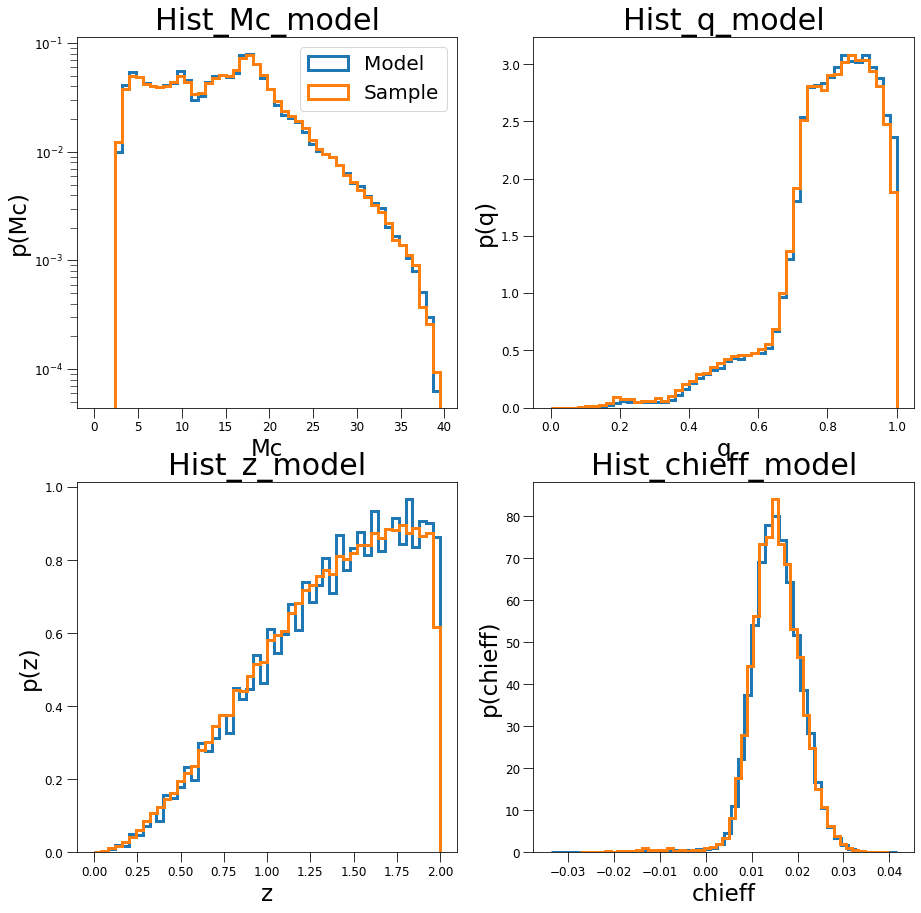

In [127]:
fig,axes = plt.subplots(2,2,figsize=(15,15))

# set a maximum Mc
mcmax = model.data_cat["Mc"].max()
#mcmax = model.data_cat["Mc"].max() if fc=="Iso" else 150.0  # can be useful for dynamical

# 1st variable
model.hist(var="Mc",ax=axes[0,0],bins=50, range_x=(0,mcmax), show=False,logy=True)
axes[0,0].hist(df_sample["Mc"], density=True, lw=3, histtype="step", bins =50, label="sample", range=(0,mcmax))
axes[0,0].legend(["Model","Sample"],fontsize=20)

# 2nd variable
model.hist(var="q",ax=axes[0,1],bins=50, show=False, range_x=(0.0,1.0))
axes[0,1].hist(df_sample["q"], density=True, lw=3, histtype="step", bins =50, label="sample", range=(0.0,1.0))

# 3rd variable
model.hist(var="z",ax=axes[1,0],bins=50, show=False)
axes[1,0].hist(df_sample["z"], density=True, lw=3, histtype="step", bins =50, label="sample")

# 4th variable
model.hist(var="chieff",ax=axes[1,1],bins=50, show=False)
axes[1,1].hist(df_sample["chieff"], density=True, lw=3, histtype="step", bins =50, label="sample")

print("Plotting...")